# Abstract Summary and Problem Statement

Problem Statement :Design the logistic regression algorithm to classify the bank notes as genuine or fake using the dataset provided by the UCI Machine Learning repository.

The aim is to predict whether given a given note is genuine or not based on the Logistic Regression coefficiencts which we are able to get using the below classifier.

We are using Logistic Regression as the classifier here and would be implementing it from scratch. We did Data sanitization, Exploratory Data Analysis, Data Scaling, Categorical feature encoding and finally implemented the Logistic Regression algorithm with train and test and K Fold cross validation.

Based on my analysis, We can opt for Learning rate = 1 which gives an accuracy of around 99%. The threshold for convergence has been kept at 1e-5(0.00001). to ensure that we converge at optimum levels.
The accuracy difference across the different learning rates is not substantially different.
We performed a 5 fold cross validation to check if the results were consistent with different random slices of data.


# Data Set Information:

This dataset is about distinguishing genuine and forged banknotes. Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400 x 400 pixels. Due to the object lens and distance to the investigated object, gray-scale pictures with a resolution of about 660 dpi were gained. A Wavelet Transform tool was used to extract features from these images. The input and the output attributes are as follows:

1. Variance of Wavelet Transformed image (continuous)
2. Skewness of Wavelet Transformed image (continuous)
3. Kurtosis of Wavelet Transformed image (continuous)
4. Entropy of image (continuous)
5. Class (target): Presumably 0 for genuine and 1 for forged

The dataset contains 1732 observations, 4 descriptives features and 1 target feature.

#### Target Feature :
The target feature is the Class(target). <br/>
0 for genuine and 1 for forged

##### We would be using the below steps during the entire process 

1. Data Preparation (Sanitization)
2. Exploratory Data Analysis (Using Pandas, Matplotlib and Seaborn)
3. Correlation Analysis to understand the intricasies of the data set
4. Scaling all the features to bring the features to the same grain.
5. WRiting the Sigmoid function
6. Apply Train and Test at different training data set sizes
7. Apply K fold Cross validation on the overall Data Set
8. Apply K Fold Cross validation on 60% Data set and use the remaining 40% data set to measure the performance.
9. Trying out different learning rates
10. Performance comparison
    

# Data Preparation

In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
# Importing the dataset
data = pd.read_csv('data/data_banknote_authentication.txt',header=None,names=["Variance", "Skewness", "Kurtosis", "Entropy","Class"])
data.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
# Check the count of all the Rings record to check if the output is biased. Doesn't look to be the case.
values = (data['Class'].value_counts())
values.head(100)

0    762
1    610
Name: Class, dtype: int64

#### The output does not look like an imbalanced data set as have almost the same set of records between genuine and forged
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

##### Display the shape of the dataset and the data types

In [9]:
# Display the shape of the dataset
print(data.shape)
# Display the Datatype of each attribute
data.dtypes

(1372, 5)


Variance    float64
Skewness    float64
Kurtosis    float64
Entropy     float64
Class         int64
dtype: object

# Data Sanitization

###### Checking whether we have null or empty data in our dataset

In [11]:
print(data.isna().sum())

Variance    0
Skewness    0
Kurtosis    0
Entropy     0
Class       0
dtype: int64


###### We dont have NAN or empty cells in our dataset so no need to apply handle Empty Cell or empty values
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Describe the Dataset

In [12]:
data.describe()

,Variance,Skewness,Kurtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Histogram and Density Distribution of all features to check out the distribution which the data set is following

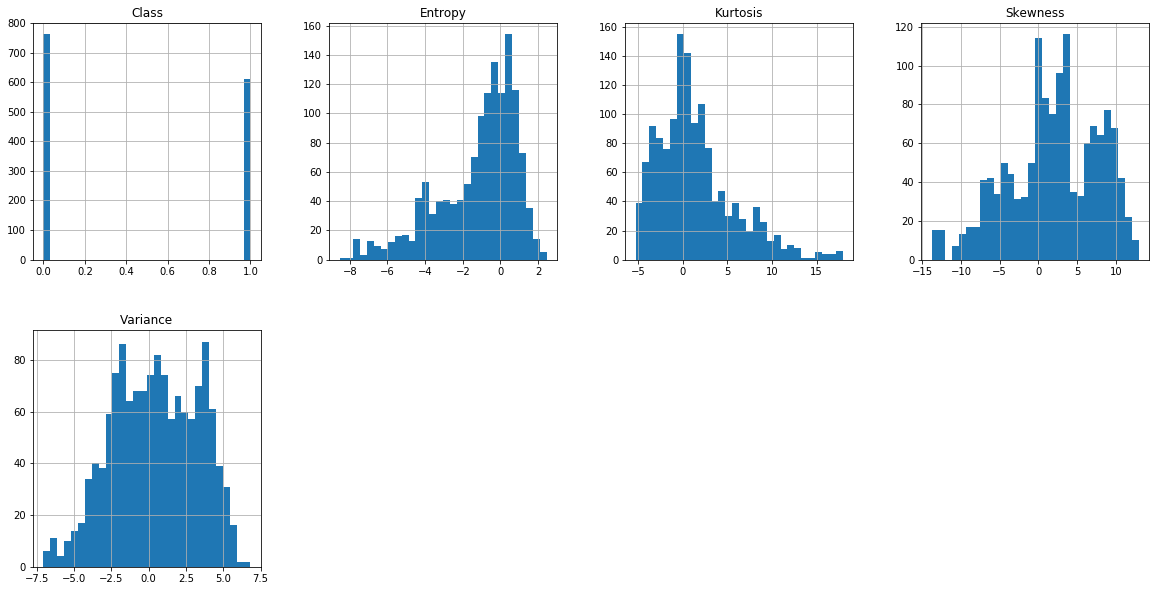

In [13]:
data.hist(figsize=(20,10), grid=True, layout=(2, 4), bins = 30);

##### Look like the Entropy is right skewed and the Kurtosis is left skewed

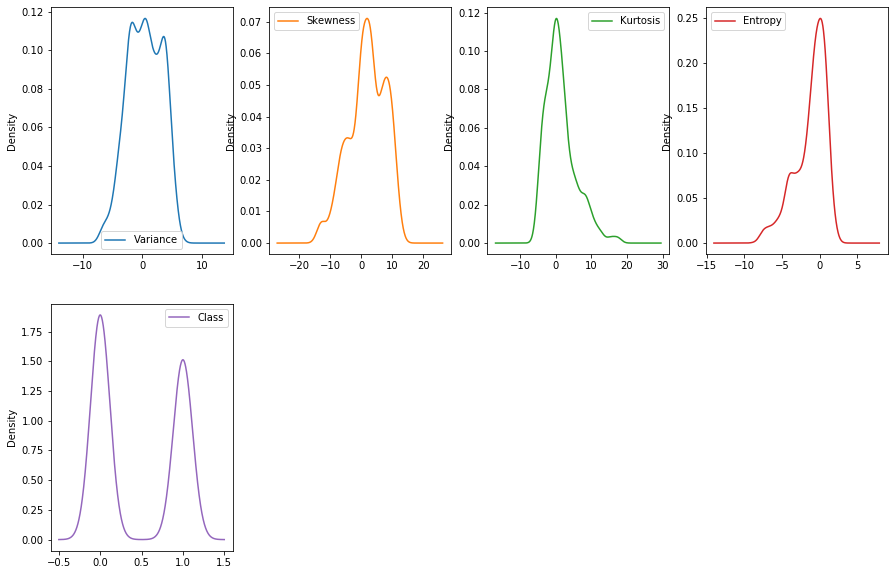

In [14]:
#Density Distribution

data.plot(kind='density',layout=(2,4),sharex=False,sharey=False,subplots=True,grid=False,
          figsize=(15,10));
plt.show()

##### Conclusion : Most of the features are not normally distributed. For the Entropy and Kurtosis attribute we can see that there is some skewness. 
##### Though the other features are not normally distributed, the Kurtosis and the skewness variable look to be more normally distributed.

### Correlation between the attributes and check how the different attributes are growing with respect to Age as an output

D:\Software\Anaconda\Software\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Software\Anaconda\Software\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


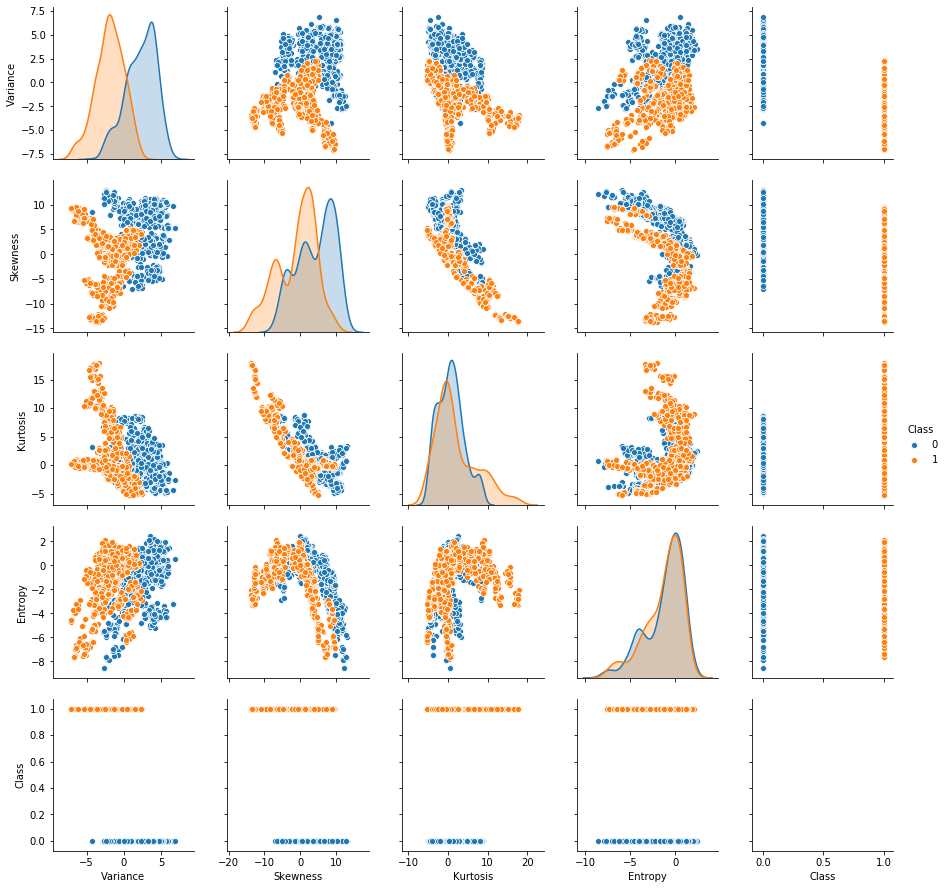

In [18]:
axis = sb.pairplot(data,hue='Class');
plt.show()
# Focus on the last row whereby we can see a correlation between the attribtes and the output variable

###### Looking at the above pair plot, we can see that there is a very specific seperation between the features 
for Eg: between Kurtosis and Variance, there is a very specific linear seperation between Genuine and forged notes. The same behaviour is exhibited more or less by other features as well.

<b>One of the pre requisites of Logistic regression is that the data should be linearly seperated for the coefficients to be effective to segregate data</b>

# Correlation analysis

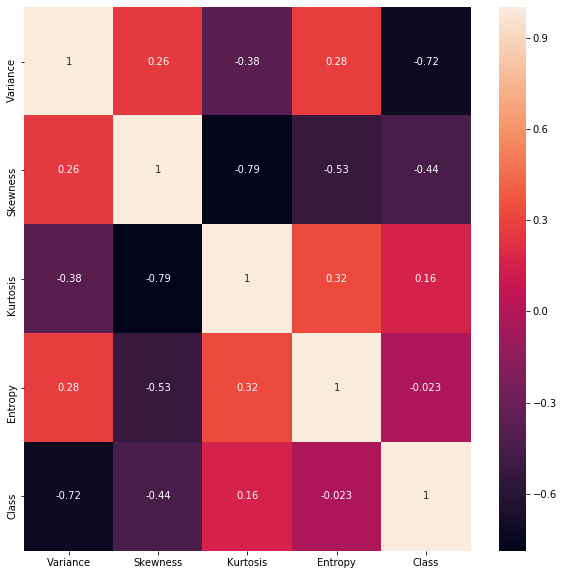

In [21]:
plt.figure(figsize=(10, 10))
corr = data.corr()
ax = sb.heatmap(corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

<br/><br/>
##### The correlation matrix, indicates a very strong negative correlation between Class and Variance, Kurtosis and Skewness. Entropy and Skewness

# Task A : Data Loading

In [25]:
def dataLoad(self, fileName):
        print(f'Loading file {fileName}')
        data = np.genfromtxt(
            self.fileName, delimiter=',')
        print(f'Loaded file {fileName} with {data.shape} records')
        return data

#### Data shape (1372, 5)
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Task B : Scaling all the features to bring the features to the same grain.

We would be normalizing the Data set using a Min - Max Scalar. The normalization equation is as below. Added a zero column to take care of the intercept column.

<img src="img/Min_max_scalar.png"  align="center" width=150 height=150 />

In [31]:
def addZeroColumn(self, data):
        """
        AddZeroColumn adds a col 0 to the data set to handle the bias
        :X: nd array object loaded from the file previously.
        :return: numpy array object containing the new column
        """
        number_of_rows = data.shape[0]
        first_column = np.ones([number_of_rows])
        data = np.insert(data, 0, first_column, axis=1)
        # print(f'Added a new X0 column {data.shape}')
        return data
    
def dataNorm(self, data):
        """
        DataNorm normalizes all the columns in the data set except the last column as the output is not to be normalized.
        For each attribute, max is the maximal value and min is the minimal. The normalization equation is: (data-min)/(max-min).
        :X: nd array object loaded from the file previously.
        :return: numpy array object containing the normalized data set
        """
        data = self.addZeroColumn(data)
        number_of_columns = data.shape[1]
        for i in range(1, number_of_columns - 1):
            v = data[:, i]
            maximum_value = v.max()
            minimum_value = v.min()
            denominator = maximum_value - minimum_value
            normalized_column = (v - minimum_value) / (denominator)
            data[:, i] = normalized_column

        # print(f'Normalized data with X0 column {data.shape}')

        return data
    
def printMeanAndSum(self, data):
        """
        Print the mean and Sum of all the columns for validation purpose.
        :X: nd array object loaded from the file previously.
        """
        column_names = ["Column", "Attribute", "Mean", "Sum"]
        attribute_names = ['Col1', 'Variance',
                           'Skewness', 'Kurtosis', 'Entropy', 'Class']
        format_row = "{:^20}" * (len(column_names)+1)
        print(format_row.format("", *column_names))

        number_of_columns = data.shape[1]
        for i in range(number_of_columns):
            mean_value = np.mean(data[:, i], axis=0)
            sum_value = np.sum(data[:, i], axis=0)
            column_number = 'Col' + str(i+1)
            row = [column_number, attribute_names[i],  mean_value, sum_value]
            print(format_row.format('', *row))


#### Before Adding intercept column : Data shape (1372, 5)
#### After Adding intercept column : Data shape (1372, 6)

<br/><br/>

<img src="img/Valid_data.png"  align="center" width=500 height=500 />

# Task C : Logistic regression equation to classify whether the bank note.

#### The below equation would be an equation of a linear hyper plane which would be seperating the hyper plane space between genuine(0) and forged notes(1)

$\ {Y} = {\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}{\beta}_{j} $

#### Can expand the above equation to the below format to handle our data set. Do note that the intercept can either be added as constant 1 feature in the data set or can be kept seperately in the equation. In our case we would add it as a column as a feature.

$\ {Y} = {\beta}_{0} * intercept + {\beta}_{1} * Variance + {\beta}_{2} * Skewness+ {\beta}_{3} * Kurtosis + {\beta}_{4} * Entropy $

##### Now the classification problem which we are trying to solve is to ensure that the sum of the signed distances are minimum
$\ {Y} = \sum \limits _{i=1} ^{p} {y}_{i} W^{T}{\beta}_{i} $

Now the grometric interpretation would be where whereby y would be (-1 and 1)

$\ W^{T}{\beta}_{i} $ would be the distance of any point from the hyper plane assuming W to be a unit vector. If the value is 1, that would be the case when it get's classified as a positive and if it is a 0 it get's incorrectly classified

#### The general logistic function which outputs a value between 0 and 1 would be as below

But we would be having issues if we have outliers as it impacts the sum of signed distances maximization function, so we need to modify this function in such a way that the outliers would not be able to impact this. We could use the sigmoid function below to Squash the data points between 0 and 1. Also it gives us a probablistic view of the data such that any point having a probablity greater than .5 would be considered to be a positive classification.
<br/><br/><br/><br/><br/><br/>

Applying the <b>Sigmoid function</b> $\ {\sigma(t)} = \dfrac{1}{1+{e^-({x}})} $ we can flatten the data points in a way that the outliers are taken care of and the output is a probablity between 0 and 1

<img src="img/squasing.png"  align="center" width=400 height=400 />

$\  {p(x)} =  {\sigma(t)} = \dfrac{1}{1+{e^-({{\beta}_{0} * intercept + {\beta}_{1} * features }})} $

#### Let's replace the features with the below equation of a hyperplace

$\ {Y} = {\beta}_{0} * intercept + {\beta}_{1} * Variance + {\beta}_{2} * Skewness+ {\beta}_{3} * Kurtosis + {\beta}_{4} * Entropy $

$\ {\sigma(t)} = \dfrac{1}{1+{e^-({{\beta}_{0} * intercept + {\beta}_{1} * Variance + {\beta}_{2} * Skewness+ {\beta}_{3} * Kurtosis + {\beta}_{4} * Entropy}})} $

Now to simplify the above equation we can use the log function which has the property that the property of moving the minima 
to the outer function so minima(f(x)) = minima(f(g(x)))

##### So we have 2 ways to define the cost function of the Logistic regression

<b> Geometric Way : </b>$\  {Cost Function(w)} = {arg min}_{w} \sum \limits _{i=1} ^{n} log( {1+{e^-({{{y}_{i} * W}^{T} * {x}_{i} }})}) $

Here $\ {y}_i $ is either -1 and 1

<b> Probablity Way : </b>$\  {Cost Function(w)} = {arg min}_{w} \sum \limits _{i=1} ^{n} -{y}_i log({p}_i) - (1-{y}_i)log(1-{p}_i)  $

Here $\ {y}_i $ is either 0 or 1 and $\ {p}_i $ is the Sigmoid function $\ {\sigma(w)} = \dfrac{1}{1+{e^-({W}^T{x}_i})} $

I would be going for the probablity approach for realizing the cost function

<br/><br/><br/><br/><br/>

# Task D : Construct the error function

<b> Probablity Way : </b>$\  {Cost Function(w)} = {arg min}_{w} \dfrac{1} {n} \sum \limits _{i=1} ^{n} -{y}_i log({p}_i) - (1-{y}_i)log(1-{p}_i)  $

We can multiply it by $\ \dfrac{1} {n} $ but we can skip it as it is just a scaling factor.

Here $\ {p}_i $ is the sigmoid function which gives the prediction value $\  {p(x)}  = \dfrac{1}{1+{e^-({{\beta}_{0} * intercept + {\beta}_{1} * features }})} $

In [51]:
def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

def errCompute(self, X, weights):
    weights = weights.reshape(len(weights))
    x = X[:, :-1]
    y = X[:, -1]

    z = x@weights
    yhat = self.sigmoid(z)

    predict_1 = y * np.log(yhat)
    predict_0 = (1 - y) * np.log(1 - yhat)
    summation = np.mean(-(predict_1 + predict_0))
    return summation

##### Explanation

Basically in Logistic regression our aim is to minimize the Loss function or the Cost function. So the arg min function basically gives the value of $\ {W} $ which ensures that the loss function is minimum. and the way we would do this is by applying Gradient descent on the above Cost function which would ensure that we get the optimum value of W which we would tune with the help of learning rate. <br/>
It takes partial derivative of Cost Function with respect to W (the slope of J), and updates W via each iteration with a selected learning rate α until the Gradient Descent has converged.


##### Applying it data set it gives the error of Test Error is 0.6931471805599454

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Task E : Use the error function (task D) to write a function errCompute()

In [53]:
def errCompute(self, X, weights):
        weights = weights.reshape(len(weights))
        x = X[:, :-1]
        y = X[:, -1]

        z = x@weights
        yhat = self.sigmoid(z)

        predict_1 = y * np.log(yhat)
        predict_0 = (1 - y) * np.log(1 - yhat)
        summation = np.mean(-(predict_1 + predict_0))
        return summation

#### Running the above function on our data set gives out the below error function

<img src="img/Error_function_proof.png"  align="center" width=400 height=400 />

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Task F :Section 3 SGD Algorithm

<b> Cost Function : </b>$\  {Cost Function(w)} = {arg min}_{w} \dfrac{1} {n} \sum \limits _{i=1} ^{n} -{y}_i log({p}_i) - (1-{y}_i)log(1-{p}_i)  $

Given the above Cost Function the gradient descent happens using the formulae   

$\ {w}_k = {w}_j - {learningRate}* \frac{ \partial { Cost Function}}{\partial w} ({w}_j) $



This eventually translates to $\ {X}^T ({Y} - \hat {Y}) $ where $\ \hat{Y} $ = $\ {\sigma(W,x)} = \dfrac{1}{1+{e^-({W^T . X}})} $

Now in the anove equation, we can see that for calculating every change in $\ W $ we need to run through the whole data set. Now this is a very heavy operation and if we have a million records, though we do the vectorization, we still need to loop through all the records.

So what SGD says is instead of looping through all the records, loop through a set of randomly choosen k records such that \$ 1\leq k \leq n $ and perform the above update operation. 

If we do this update sufficient number of times, the \$ {W}^*_{GD} $ would be the same as SGD Weights 

By following this approach we save upon the looping across the whole data set and just need to loop through a bunch of randomly selected k points many times such that the eventual weights are still the same.<br/>

We would be picking a fixed set of batches, let's say 100 and then randomly distribute the X values to these 100 batches. Some Batches might have more number of records in case if the total number of records is an odd number. We need to ensure that each and every record is available only in one batch per se. <br/>

Next we loop through all these 100 batches and apply gradient descent. The evaluation of the convergence happens at the end of every epoch. A single pass through all the patches would be called a single epoch as every single record in the data set has contributed to the gradient measurement once. One epoch would be requiring the equilant amount of processing as a single iteration of gradient descent, but since we are note going through the whole data set when calculating the loss, eventually we would be saving time here. <br/>

Some of the validations like convergence checking etc, we would be doing only at the end of each epoch. <br/>
1. Batch steps more likely to in roughly the right direction towards the minima without the back-and-forth pathology of Gradient Descent.
2. We would be able to leverage on the GPU vectorization primitives our hardware supports. 


In [66]:
tolerance = 1e-5

def gradient_descent(self, X, learning_rate):
        n_samples, n_features = X.shape
        x = X[:, :-1]
        y = X[:, -1]

        z = x@self.weights
        yhat = self.sigmoid(z).reshape(n_samples)
        dw = (1/n_samples) * np.dot(x.T, (yhat - y))
        self.weights -= learning_rate * dw
        
def stochasticGD(self, X, weights, learning_rate, epoch):
        weights = weights.reshape(len(weights))
        previous_loss = -float('inf')
        n_samples, n_features = X.shape
        self.weights = weights  # np.zeros(n_features-1)
        converged = False
        number_of_runs = 0
        for _ in range(epoch):

            loss = self.errCompute(X, weights)
            number_of_runs += 1
            # convergence check
            if abs(previous_loss - loss) < self.tolerance:
                # print(f'Within tolerace limit of {self.tolerance}')
                converged = True
                break
            else:
                previous_loss = loss
            self.gradient_descent(X, learning_rate)
        print(f"Number of runs {number_of_runs}")
        return self.weights.reshape((len(self.weights), 1))

def stochasticMiniBatchGradientDescent(self, X, weights, learning_rate, max_iter):

        weights = weights.reshape(len(weights))
        self.weights = weights
        previous_loss = -float('inf')
        iterations = 0
        folds = 100

        for _ in range(max_iter):

            k_fold_partitions = self.splitCV(X, folds)
            for index, item in enumerate(k_fold_partitions):
                self.gradient_descent(item, learning_rate)
            loss = self.errCompute(X, weights)
            if abs(previous_loss - loss) < self.tolerance:
                print(f'Within tolerace limit of {self.tolerance}')
                break
            else:
                previous_loss = loss
            iterations += 1
        print(f"Number of runs {iterations}")
        return self.weights.reshape((len(self.weights), 1))



# Task G :Split the dataset into training and test set using 5 sets of train-and-test split method with 60 –40% split.

I have implemented 3 methods :

1. Split Training Data
2. Split Cross Validation
3. K Folds Cross Validation


In [16]:
def trainandTest(self, X_Train, X_Test, learning_rate):
    classifier = Logistic_Regression("")
    data = classifier.dataNorm(X_Train)
    test_data = classifier.dataNorm(X_Test)
    theta = np.zeros((data.shape[1]-1, 1))
    theta = classifier.stochasticGD(
        data, theta, learning_rate, len(X_Train)*20)
    y_prediction_cls, accuracy = classifier.predict(test_data, theta)
    return accuracy, y_prediction_cls, theta

def splitTT(self, X, percentTrain):
    """
    Takes in the normalized dataset X_norm , and the expected portion
    of train dataset percentTrain (e.g. 0.6), returns a list X_split=[X_train,X_test]
    :X: nd array object normalized.
    :percentTrain: percent of the records which are to be splitted to train and test.
    :return: list of numpy array objects containing the Training and Test records
    """
    np.random.shuffle(X)
    N = len(X)
    sample = int(percentTrain*N)
    x_train, x_test = X[:sample, :], X[sample:, :]
    return [x_train, x_test]

def splitCV(self, X, folds):
    """
    Takes in the normalized dataset X_norm ,and the number of folds needed
    This would split the number of records equlilantly in every partition. If k is a number which cannot be equliably splitted
    it would distribute the extra records into all the partitions.
    :X: nd array object normalized.
    :folds: number of folds needed.
    :return: list of numpy array objects containing the different folds or partitions
    """
    np.random.shuffle(X)
    split_array = np.array_split(X, folds)
    return split_array

def k_fold_cross_validation(self, X, folds, learning_rate):
    """
    Takes in the Normalized array and number of k-values needed and the number of folds needed.
    The function would iterate over all the fold partitions except the fold in enumeration 
    and get the other folds and call the knn algorithm those many times to get the accuracy. 
    The returned accuracy is the mean of the individual fold accuracies and also a list of predicted labels
    which would be used in the Classification report
    :X: Train Data set which is a nd array object normalized.
    :k: k-value. 
    :folds: number of folds for which knn needs to be done.
    :return: accuracy of this iteration and list of predicted outputs
    """
    weights_accuracy_vector = []
    accuracy_listing = []
    actual_predicted_labels = []
    k_fold_partitions = self.splitCV(X, folds)
    for index, item in enumerate(k_fold_partitions):
        cross_validation_dataset = item
        list_of_items_from_zero_to_index = k_fold_partitions[0:index]
        list_of_items_from_index_to_end = k_fold_partitions[index+1:]
        total_train_list = list_of_items_from_zero_to_index + \
            list_of_items_from_index_to_end
        train_data_set = np.vstack(total_train_list)
        accuracy_for_cross_validation, actual_predicted_labels_from_partition, theta = self.trainandTest(
            train_data_set, cross_validation_dataset, learning_rate)
        print(f'Thetha is : {theta}')
        weights_accuracy_vector.append(
            (index, accuracy_for_cross_validation, theta))
        accuracy_listing.append(accuracy_for_cross_validation)
        actual_predicted_labels.append(
            actual_predicted_labels_from_partition)
    print(f'Accuracy Listing {accuracy_listing}')
    accuracy_average = np.average(accuracy_listing)

    print(
        f'Folds : {folds}, Accuracy Average : {accuracy_average} ')
    return accuracy_average, actual_predicted_labels, weights_accuracy_vector


In [6]:
import pandas as pd
import numpy as np

# Task H :Section 5 Experimental Result.

In [17]:
stats = pd.read_csv('data\statistics.csv')
stats.head()
df = stats[['Cross_Validation_Fold','learning_Rate','Epochs','Accuracy','Bias','Variance','Skewness','Kurtosis','Entropy']]
average_accuracy= np.mean(stats['Accuracy'])


#### The below table shows the accuracy of the algorithm across different Learning Rates

In [18]:
pd.pivot_table(df,index=["learning_Rate","Cross_Validation_Fold"])

Accuracy       Bias   Entropy  Epochs  \
learning_Rate Cross_Validation_Fold                                          
0.1           Set - 0                0.969697  22.319916  2.169690     185   
              Set - 1                0.987879  17.813333  1.585684      98   
              Set - 2                0.975758  15.596009  1.858677      72   
              Set - 3                0.969512  23.182722  2.468721     220   
              Set - 4                0.975610  13.187754  2.224188      55   
0.2           Set - 0                1.000000  27.188315  1.101463     159   
              Set - 1                0.987879  24.848787  2.016749     128   
              Set - 2                0.975758  24.478162  1.903986     118   
              Set - 3                0.981707  25.123420  1.871681     127   
              Set - 4                0.957317  24.131004  2.256486     118   
0.3           Set - 0                0.981818  32.522750  1.829095     194   
              Set - 1                0.993939  32.231334  2.287773     200   
              Set - 2                0.981818  32.606044  1.350109     189   
              Set - 3                0.987805  18.413365  1.559804      34   
              Set - 4                0.981707  30.152775  1.892771     155   
0.4           Set - 0                1.000000  30.170424  1.542720     119   
              Set - 1                0.963636  42.312075  0.797174     337   
              Set - 2                0.987879  32.283594  1.802564     146   
              Set - 3                0.975610  37.425750  1.487245     228   
              Set - 4                0.975610  30.625651  1.865598     117   
1.0           Set - 0                0.993939  49.596606  1.971664     247   
              Set - 1                0.993939  52.146944  0.116689     281   
              Set - 2                0.987879  46.608054  1.245475     185   
              Set - 3                0.987805  43.723038  0.834287     150   
              Set - 4                0.987805  30.877645  1.710670      49   

                                      Kurtosis   Skewness   Variance  
learning_Rate Cross_Validation_Fold                                   
0.1           Set - 0               -17.197228 -15.445611 -19.247549  
              Set - 1               -13.152891 -12.264365 -15.313813  
              Set - 2               -11.388497 -10.315039 -14.646264  
              Set - 3               -17.982889 -16.641442 -19.886109  
              Set - 4                -9.489182  -8.693753 -13.894934  
0.2           Set - 0               -20.968691 -19.911754 -20.980773  
              Set - 1               -19.280898 -17.753198 -20.843100  
              Set - 2               -19.130121 -17.851882 -19.036924  
              Set - 3               -19.530166 -18.215816 -19.995727  
              Set - 4               -18.517801 -16.778645 -21.001944  
0.3           Set - 0               -25.863035 -24.217674 -25.273275  
              Set - 1               -26.072209 -24.042299 -25.056163  
              Set - 2               -25.477178 -23.924921 -24.078986  
              Set - 3               -13.403230 -12.529662 -16.154398  
              Set - 4               -23.492748 -22.009687 -23.630653  
0.4           Set - 0               -23.765980 -22.467840 -23.841801  
              Set - 1               -33.703734 -31.151523 -29.875638  
              Set - 2               -25.668266 -24.192987 -25.155910  
              Set - 3               -29.511332 -28.421465 -27.695844  
              Set - 4               -23.863991 -22.369997 -23.737094  
1.0           Set - 0               -40.482746 -37.939892 -36.581154  
              Set - 1               -41.334161 -40.218941 -36.350982  
              Set - 2               -37.102597 -35.348025 -34.480615  
              Set - 3               -34.574034 -32.002832 -31.003566  
              Set - 4               -24.392119 -22.985619 -25.093069

# Average Accuracy for different learning rates

In [19]:
accuracy = pd.pivot_table(df,index=["learning_Rate"],values=["Accuracy"],aggfunc=np.mean)
accuracy = accuracy.reset_index()
accuracy['Accuracy'] = accuracy['Accuracy']*100
accuracy

,learning_Rate,Accuracy
0,0.1,97.569106
1,0.2,98.053215
2,0.3,98.541759
3,0.4,98.054693
4,1.0,99.027347


#### Based on the above table, We can opt for Learning rate = 1 which gives an accuracy of around 99%. This being a balanced data set we can clearly see a linear seperation between the classes. <br/>
#### There is not a huge difference in the accuracy rates of our model. Just  a 1% difference.
#### The Coefficients  have been defined in the above table for different learning rates

<br/><br/><br/>

# Task I :Graph on the error function vs iterations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
error_rate = pd.read_csv('data\error_rate.csv')

In [3]:
def drawErrorRateChart(error_rate,learning_rate):
    dataset0 = error_rate[(error_rate['learning_Rate'] == learning_rate) & (error_rate['Cross_Validation_Fold'] == 'Set - 0'  )]
    dataset1 = error_rate[(error_rate['learning_Rate'] == learning_rate) & (error_rate['Cross_Validation_Fold'] == 'Set - 1'  )]
    dataset2 = error_rate[(error_rate['learning_Rate'] == learning_rate) & (error_rate['Cross_Validation_Fold'] == 'Set - 2'  )]
    dataset3 = error_rate[(error_rate['learning_Rate'] == learning_rate) & (error_rate['Cross_Validation_Fold'] == 'Set - 3'  )]
    dataset4 = error_rate[(error_rate['learning_Rate'] == learning_rate) & (error_rate['Cross_Validation_Fold'] == 'Set - 4'  )]
    fig, axs = plt.subplots(nrows =3,  ncols= 2,figsize=(10, 10))


    axs[0, 0].plot(dataset0['index'], dataset0['Error_Rate'])
    axs[0, 0].set_title('Set 0',fontsize='x-large', fontweight='bold', pad=10, size = 10)
    axs[0, 0].set_ylabel('Error Rate',fontsize='large', fontweight='bold', size = 10)

    axs[0, 1].plot(dataset1['index'], dataset1['Error_Rate'], 'tab:orange')
    axs[0, 1].set_title('Set 1',fontsize='large', fontweight='bold', pad=10,size = 10)

    axs[1, 0].plot(dataset2['index'], dataset2['Error_Rate'], 'tab:green')
    axs[1, 0].set_title('Set 2',fontsize='large', fontweight='bold', pad=10,size = 10)
    axs[1, 0].set_ylabel('Error Rate',fontsize='large', fontweight='bold', size = 10)

    axs[1, 1].plot(dataset3['index'], dataset3['Error_Rate'], 'tab:red')
    axs[1, 1].set_title('Set 3',fontsize='large', fontweight='bold', pad=10,size = 10);

    axs[2, 0].plot(dataset3['index'], dataset3['Error_Rate'], 'tab:pink')
    axs[2, 0].set_title('Set 4',fontsize='large', fontweight='bold', pad=10,size = 10);
    axs[2, 0].set_xlabel('Iterations',fontsize='large', fontweight='bold', size = 10)
    axs[2, 0].set_ylabel('Error Rate',fontsize='large', fontweight='bold', size = 10)

    axs[2, 1].set_xlabel('Iterations',fontsize='large', fontweight='bold', size = 10)

    plt.tight_layout()
    fig.subplots_adjust(wspace=0.3, hspace = 0.2)
    plt.show()



#### Explanation : I am trying to do map out the error rate vs number of iterations for differnt combinations of batch size and learning rates. Not combining them as the graphs are pretty close

#### First trying to chart out a mini batch size of 1 (Stochastic whereby the whole data set is gone through as a whole, by chaing the batch size as 1 in the program). What we note is that the gradient descent happens smoothly as for every iteration, it goes through all data points and then the weight factor decreases. 

#### Do note that this is a long training process as it drops down incrementally in a slow way

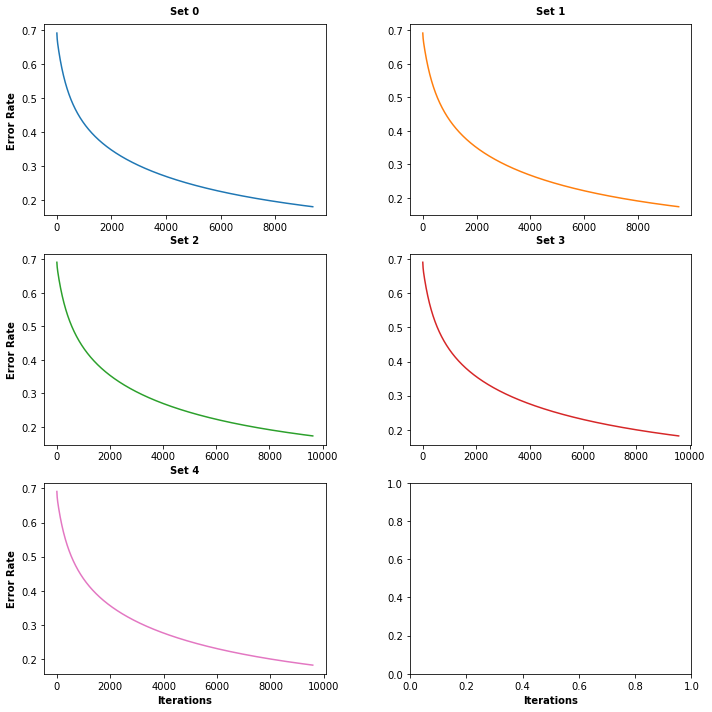

In [27]:
drawErrorRateChart(error_rate,2)

##### For a batch size of 100 and an learning rate of 2, we can see these minor spikes in the error rate.This is expected
##### as the randomly chosen x values give out the value which introduces the spike. 
#### One major advantage is that it converges quickly as compared to the stochastic with batch size as 1 which goes through the whole data set, in a way the number of iterations is quiet high 

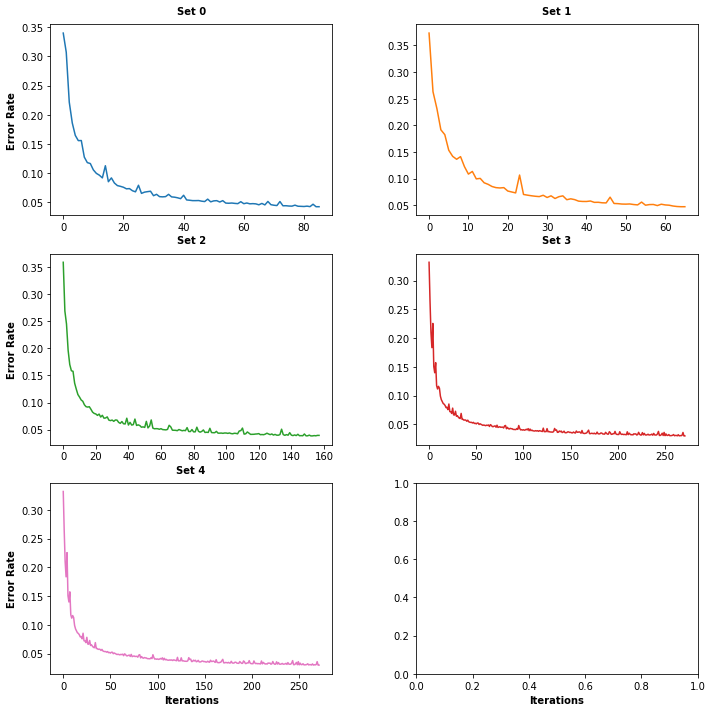

In [31]:
drawErrorRateChart(error_rate,2)

##### Now let's see how this behaves for batch size of 300 and different learning rates 

## Learning Rate = 0.1 with Batch Size 300

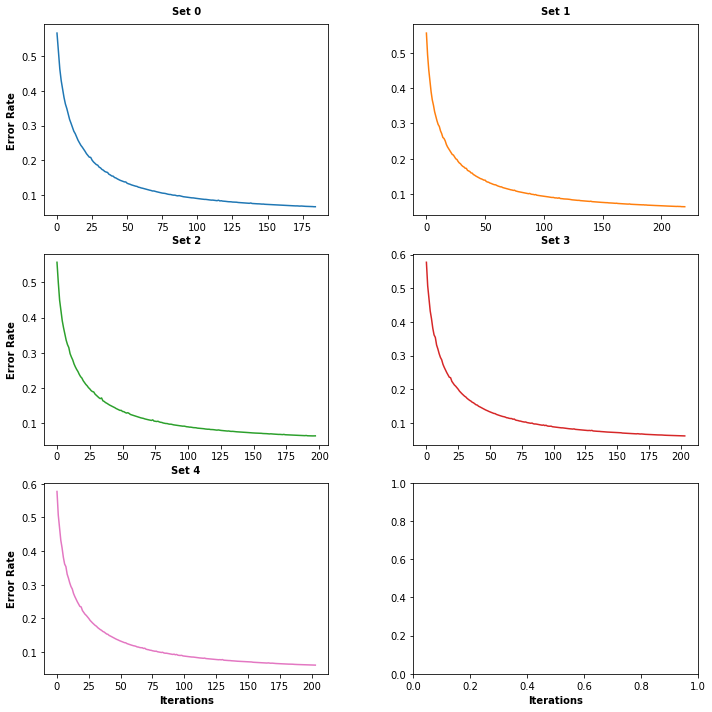

In [42]:
drawErrorRateChart(error_rate,.1)

## Learning Rate = 0.3

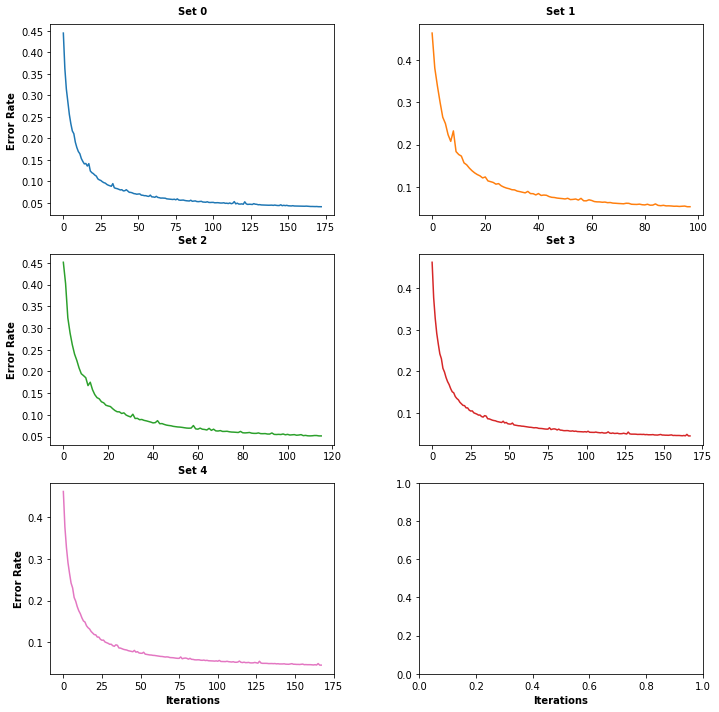

In [43]:
drawErrorRateChart(error_rate,.3)

## Learning Rate = 1with Batch size 300
## Now here we need to note that as the learning rate increases we can see more spikes as the values start taking more strides

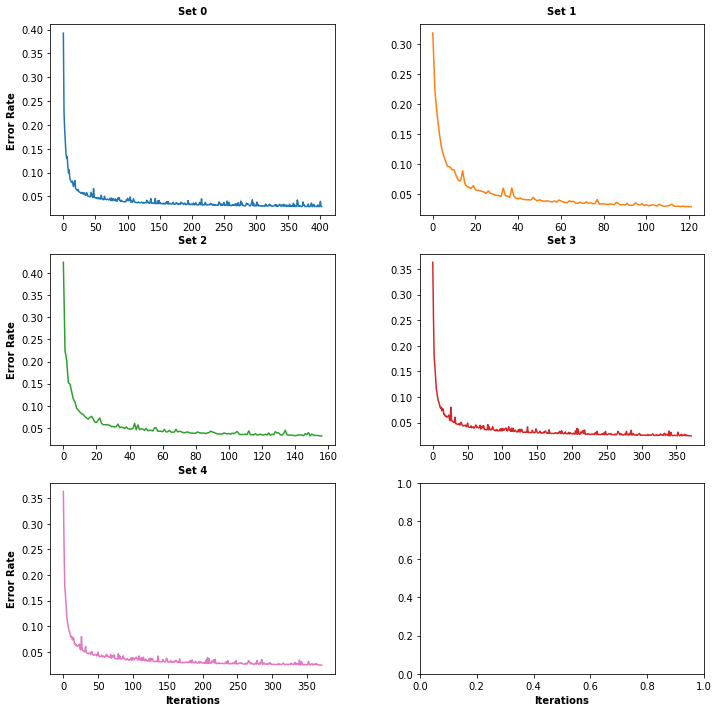

In [45]:
drawErrorRateChart(error_rate,1)

### Learning Rate : 2 with Batch size of 300

##### We can see that with a higher learning rate we have oscillations in the error rate as that might come different randomly choosen batch data sets but on an average we can see that the the number of steps here is much smaller than as compared with batch size 1 and learning rate .1

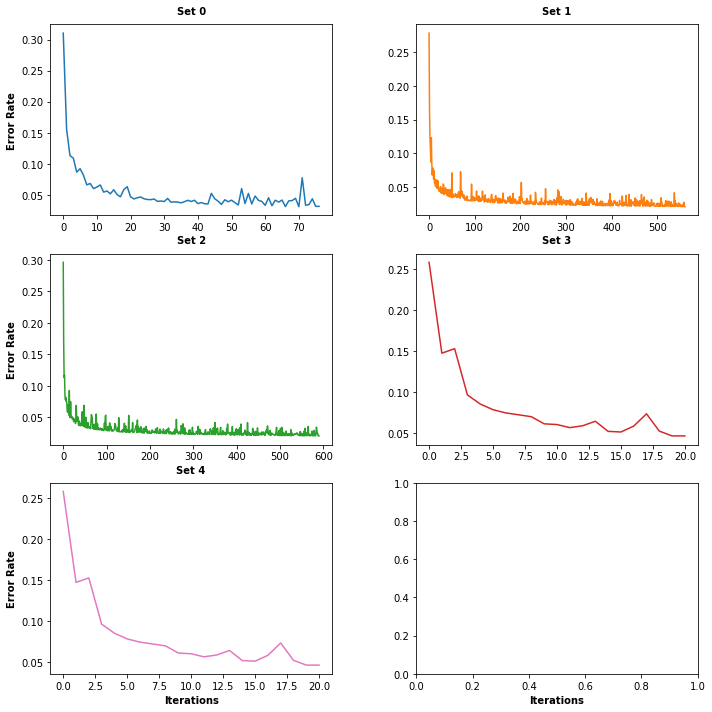

In [46]:
drawErrorRateChart(error_rate,2)

# Observations :

When the learning rates are low it takes a lot of iterations to arrive at an optimum weight which does the classification appropriately. The number of iterations are high in that case.
When the learning rates are high, we can see a lot of spikes in the chart as it indicates that it skips the minimum point many times and keeps ding doinging around the minima.

The batch size also contributes to the speed with which the convergence happens. A higher batch size ensures that the model comes across a lot of data points and the convergence hapens earlier. With a smaller batch size, it takes a long time to converge as every single weight reduction at the end of the epoch whereby it goes through the whole data set. We have selected a batch size of 300 here after trying out a few combinations like 1(Stochastic Gradient) and mini batches of sizes like 100,200,300,400 and 500. 

##### Inference 

https://towardsdatascience.com/what-makes-logistic-regression-a-classification-algorithm-35018497b63f

https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11

http://www.oranlooney.com/post/ml-from-scratch-part-2-logistic-regression/